# SETUP

In [1]:
# run IPYNB that imports all the relevant packages and functions
%run ../ms_packages_and_functions.ipynb

/home/mjms/anaconda3/envs/reach-analysis-v08/lib/python3.8/site-packages/bids/layout/validation.py:46: UserWarning: The ability to pass arguments to BIDSLayout that control indexing is likely to be removed in future; possibly as early as PyBIDS 0.14. This includes the `config_filename`, `ignore`, `force_index`, and `index_metadata` arguments. The recommended usage pattern is to initialize a new BIDSLayoutIndexer with these arguments, and pass it to the BIDSLayout via the `indexer` argument.
  warnings.warn("The ability to pass arguments to BIDSLayout that control "


In [2]:
output_dir = pjoin(os.getcwd(), 'processed_data')
data_dir  = pjoin(os.getcwd(), 'raw_data')

In [ ]:
run_path = pjoin(output_dir,'All_Decoder_plotting+statistics')

if not os.path.exists(run_path):
    os.mkdir(run_path)
    print("created directory: {}".format(run_path))
else:
    print("All files will be saved in: {}".format(run_path))

In [ ]:
fig_dir = pjoin(run_path,'figures')

if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
    print("created directory: {}".format(fig_dir))
else:
    print("All files will be saved in: {}".format(fig_dir))

In [5]:
all_decoder_performance ={'cues': [{'FR + FN':loadPickle('processed_data/RS_Decoder_005/50-run/FRFN_performance_score.pkl'),
                            'FR':loadPickle('processed_data/RS_Decoder_005/50-run/FR_performance_score.pkl'),
                            'FN':loadPickle('processed_data/RS_Decoder_005/50-run/FN_performance_score.pkl'),
                            'null FN': loadPickle('processed_data/RS_Decoder_004/null-10runs.pkl')},
                           {'FR + FN':loadPickle('processed_data/RJ_Decoder_cutoff-000/FRFN_performance_score.pkl'),
                            'FR':loadPickle('processed_data/RJ_Decoder_cutoff-000/FR_performance_score.pkl'),
                            'FN':loadPickle('processed_data/RJ_Decoder_cutoff-000/FN_performance_score-50.pkl'),
                            'null FN': loadPickle('processed_data/RJ_Decoder_cutoff-000/null_performance_score-50.pkl')}],
                          'MO':[{'FR + FN':loadPickle('processed_data/RS_Decoder_MOcentered_006/FRFN_performance_score_50runs.pkl'),
                            'FR':loadPickle('processed_data/RS_Decoder_MOcentered_006/FR_performance_score_50runs.pkl'),
                            'FN':loadPickle('processed_data/RS_Decoder_MOcentered_006/FN_performance_score_50runs.pkl'),
                            'null FN': loadPickle('processed_data/RS_Decoder_MOcentered_006/nullFN_performance_score_50runs.pkl')},
                           {'FR + FN':loadPickle('processed_data/RJ_Decoder_MOcentered_001/FRFN_performance_score_50runs.pkl'),
                            'FR':loadPickle('processed_data/RJ_Decoder_MOcentered_001/FR_performance_score_50runs.pkl'),
                            'FN':loadPickle('processed_data/RJ_Decoder_MOcentered_001/FN_performance_score_50runs.pkl'),
                            'null FN': loadPickle('processed_data/RJ_Decoder_MOcentered_001/nullFN_performance_score_50runs.pkl')}]}
                          

# Plot

Subject RS: FRFN vs FR, time 0.16999999999999998s to 0.19s
Subject RS: FRFN vs FR, time 0.21000000000000002s to 0.41000000000000003s
Subject RS: FRFN vs FR, time 0.43000000000000005s to 0.45000000000000007s
Subject RS: FRFN vs FR, time 0.47s to 0.51s
Subject RS: FRFN vs FR, time 0.53s to 0.54s
Subject RS: FRFN vs FR, time 0.56s to 0.5800000000000001s
Subject RS: FN_null, time -0.10000000000000003s to -0.10000000000000003s
Subject RS: FN_null, time 0.24s to 0.24s
Subject RS: FN_null, time 0.28s to 0.28s
Subject RS: FN_null, time 0.30000000000000004s to 0.31000000000000005s
Subject RS: FN_null, time 0.32999999999999996s to 0.36s
Subject RS: FN_null, time 0.38s to 0.39s
Subject RS: FN_null, time 0.41000000000000003s to 0.42000000000000004s
Subject RS: FN_null, time 0.44000000000000006s to 0.44000000000000006s
Subject RS: FN_null, time 0.45999999999999996s to 0.48s
Subject RS: FN_null, time 0.52s to 0.52s
Subject RS: FN_null, time 0.54s to 0.55s
Subject RS: FRFN vs FR, time -0.099999999999

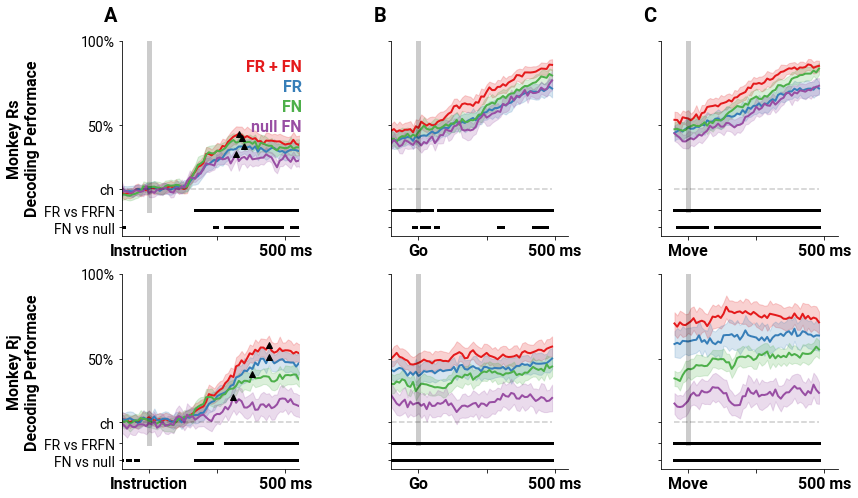

In [9]:
# sns.set_context("paper")
afont = {'fontname':'Roboto','fontsize' : 16, 'ha':'center','weight':'bold'}
bfont = {'fontname':'Roboto','fontsize' : 14}
hfont = {'fontname':'Roboto','fontsize' : 20,'weight':'bold'}
cols = 3
rows = 2

subject_names = ['Monkey Rs', 'Monkey Rj']#'Monkey Bx']
fig = plt.figure(figsize=(12,7))


plot_num = 1

# Plot FRFN vs FR
num_subjects = 2
decoders = ['FR + FN', 'FR','FN','null FN']
cmap = sns.color_palette("Set1",5)[:len(decoders)]
ch = (1/8)*100
p_th = 0.01
for s,subject in enumerate(['RS','RJ']) :
     
    for col in range(cols):
        ax = fig.add_subplot(rows,cols,plot_num)
        
        if col == 0 :
            start_time = time2bin(-0.1,lastBin=True)
            end_time = time2bin(0.6,lastBin=True)
        
            for i,k in enumerate(decoders):
                mean = np.mean(all_decoder_performance['cues'][s][k],axis=0)*100
                mean = mean[start_time:end_time]
                err = np.std(all_decoder_performance['cues'][s][k],axis=0)*100
                err = err[start_time:end_time]
                
                
                x = [bin2time(x,lastBin=True) for x in np.arange(start_time,end_time)]

                plt.plot(x,mean, c=cmap[i],label=k,linewidth=2)
                plt.fill_between(x,mean-err,mean+err, color=cmap[i],alpha=0.20)

                initial_peak = np.argmax(mean[:time2bin(0.5,lastBin=True)])
                plt.plot(x[initial_peak],mean[initial_peak],'k^')
            
            if s == 0:
                leg = ax.legend(frameon=False, handlelength=0,loc=(0.95,0.5))
                
                for h, t in enumerate(leg.get_texts()):
                    t.set_color(cmap[h])
                    t.set_weight("bold")
                    t.set_size(16) 
                    t.set_ha('right')
                    
            #################
            # FRFN vs FR: Instruction: Statistics
            FRFN_performance = all_decoder_performance['cues'][s]['FR + FN']
            FR_performance = all_decoder_performance['cues'][s]['FR']
            p = [stats.mannwhitneyu([x[t] for x in FRFN_performance],[x[t] for x in FR_performance])[1] for t in range(len(FR_performance[0]))]
            p_corr = multipletests(p,p_th,method='bonferroni')            

            for x0,x1 in zip(first_and_last_seq(p_corr[0][start_time:end_time],True)[0],\
                             first_and_last_seq(p_corr[0][start_time:end_time-1],True)[1]):
                plt.plot([x[x0],x[x1+1]],[0,0],'k',linewidth=3)
                print(f'Subject {subject}: FRFN vs FR, time {x[x0]}s to {x[x1]}s')

            ##################
            FN_performance = all_decoder_performance['cues'][s]['FN']
            nullFN_performance = all_decoder_performance['cues'][s]['null FN']
            p = [stats.mannwhitneyu([x[t] for x in nullFN_performance],[x[t] for x in FN_performance])[1] for t in range(len(FN_performance[0]))]
            p_corr = multipletests(p,p_th,method='bonferroni')            

            for x0,x1 in zip(first_and_last_seq(p_corr[0][start_time:end_time],True)[0],\
                             first_and_last_seq(p_corr[0][start_time:end_time-1],True)[1]):
                plt.plot([x[x0],x[x1+1]],[-10,-10],'k',linewidth=3)
                print(f'Subject {subject}: FN_null, time {x[x0]}s to {x[x1]}s')

            #################
            #   
            ax.plot([0,0],[0,100],'k', linewidth=5, alpha=0.2)
            ax.plot(x,np.ones(len(x))*ch,'k--', alpha=0.2)
            ticks = np.sort(np.hstack([np.arange(0,110,50),(1/8)*100,-10]))
            labels = ['FR vs FRFN' if x==0 else 'FN vs null' if x==-10 else 'ch' if x==(1/8)*100 else str(round(x))+'%'  for x in ticks]
            ax.set_yticks(ticks)
            ax.set_yticklabels(labels,**bfont)
            ax.set_ylim([-15,100])
            
            ax.set_ylabel(f'{subject_names[s]}\nDecoding Performace', multialignment='center',**afont)

            ticks = np.arange(0,0.75,0.25)
            labels = ['500 ms' if round(x,2)==0.5 else ' '  for x in ticks]
            labels[int(np.where(ticks==0)[0])] = 'Instruction'

            ax.set_xticks(ticks)
            ax.set_xticklabels(labels,**afont)
            ax.get_xticklabels()[1].set_weight("bold")
            sns.despine(ax=ax)
            
        ## FRFN vs FR: GO
        if col == 1 :
            start_time = time2bin(0.9,lastBin=True)
            end_time = time2bin(1.50,lastBin=True)
        
            for i,k in enumerate(decoders):
                mean = np.mean(all_decoder_performance['cues'][s][k],axis=0)*100
                mean = mean[start_time:end_time]
                err = np.std(all_decoder_performance['cues'][s][k],axis=0)*100
                err = err[start_time:end_time]
                
                
                x = [bin2time(x,lastBin=True)-1 for x in np.arange(start_time,end_time)]

                plt.plot(x,mean, c=cmap[i],label=k,linewidth=2)
                plt.fill_between(x,mean-err,mean+err, color=cmap[i],alpha=0.20)

            #################
            # FRFN vs FR: Go: Statistics
            FRFN_performance = all_decoder_performance['cues'][s]['FR + FN']
            FR_performance = all_decoder_performance['cues'][s]['FR']
            p = [stats.mannwhitneyu([x[t] for x in FRFN_performance],[x[t] for x in FR_performance])[1] for t in range(len(FR_performance[0]))]
            p_corr = multipletests(p,p_th,method='bonferroni')            

            for x0,x1 in zip(first_and_last_seq(p_corr[0][start_time:end_time],True)[0],\
                             first_and_last_seq(p_corr[0][start_time:end_time-1],True)[1]):
                plt.plot([x[x0],x[x1+1]],[0,0],'k',linewidth=3)
                print(f'Subject {subject}: FRFN vs FR, time {x[x0]}s to {x[x1]}s')

            ##################
            # FN vs FN null: Go: Statistics
            FN_performance = all_decoder_performance['cues'][s]['FN']
            nullFN_performance = all_decoder_performance['cues'][s]['null FN']
            p = [stats.mannwhitneyu([x[t] for x in nullFN_performance],[x[t] for x in FN_performance])[1] for t in range(len(FN_performance[0]))]
            p_corr = multipletests(p,p_th,method='bonferroni')      

            for x0,x1 in zip(first_and_last_seq(p_corr[0][start_time:end_time],True)[0],\
                             first_and_last_seq(p_corr[0][start_time:end_time-1],True)[1]):
                plt.plot([x[x0],x[x1+1]],[-10,-10],'k',linewidth=3)
                print(f'Subject {subject}: FN vs null, time {x[x0]}s to {x[x1]}s')

                
            ##################
            ax.plot([0,0],[0,100],'k', linewidth=5, alpha=0.2)
            ax.plot(x,np.ones(len(x))*ch,'k--', alpha=0.2)
            ticks = np.sort(np.hstack([np.arange(0,110,50),(1/8)*100,-10]))
            # labels = ['FR vs FRFN' if x==0 else 'FN vs null' if x==-10 else 'ch' if x==(1/8)*100 else str(round(x))+'%'  for x in ticks]
            ax.set_yticks(ticks)
            ax.set_yticklabels([],**bfont)
            ax.set_ylim([-15,100])

        
            ticks = np.arange(0,0.75,0.25)
            labels = ['500 ms' if round(x,2)==0.5 else ' '  for x in ticks]
            labels[int(np.where(ticks==0)[0])] = 'Go'

            ax.set_xticks(ticks)
            ax.set_xticklabels(labels,**afont)
            ax.get_xticklabels()[1].set_weight("bold")
            sns.despine(ax=ax)
                
        if col == 2 :
            start_time = time2bin(-0.1,lastBin=True,buffer=0.5)
            end_time = time2bin(0.44,lastBin=True,buffer=0.5)
        
            for i,k in enumerate(decoders):
                mean = np.mean(all_decoder_performance['MO'][s][k],axis=0)*100
                mean = mean[start_time:end_time]
                err = np.std(all_decoder_performance['MO'][s][k],axis=0)*100
                err = err[start_time:end_time]
                
                
                x = [bin2time(x,lastBin=True) for x in np.arange(start_time,end_time)]

                plt.plot(x,mean, c=cmap[i],label=k,linewidth=2)
                plt.fill_between(x,mean-err,mean+err, color=cmap[i],alpha=0.20)

            #################
            # FRFN vs FR: MO: Statistics
            FRFN_performance = all_decoder_performance['MO'][s]['FR + FN']
            FR_performance = all_decoder_performance['MO'][s]['FR']
            p = [stats.mannwhitneyu([x[t] for x in FRFN_performance],[x[t] for x in FR_performance])[1] for t in range(len(FR_performance[0]))]
            p_corr = multipletests(p,p_th,method='bonferroni')            

            for x0,x1 in zip(first_and_last_seq(p_corr[0][start_time:end_time],True)[0],\
                             first_and_last_seq(p_corr[0][start_time:end_time-1],True)[1]):
                plt.plot([x[x0],x[x1+1]],[0,0],'k',linewidth=3)
                print(f'Subject {subject}: FRFN vs FR, time {x[x0]}s to {x[x1]}s')

            ##################
            FN_performance = all_decoder_performance['MO'][s]['FN']
            nullFN_performance = all_decoder_performance['MO'][s]['null FN']
            p = [stats.mannwhitneyu([x[t] for x in nullFN_performance],[x[t] for x in FN_performance])[1] for t in range(len(FN_performance[0]))]
            p_corr = multipletests(p,p_th,method='bonferroni')      

            for x0,x1 in zip(first_and_last_seq(p_corr[0][start_time:end_time],True)[0],\
                             first_and_last_seq(p_corr[0][start_time:end_time-1],True)[1]):
                plt.plot([x[x0],x[x1+1]],[-10,-10],'k',linewidth=3)
                print(f'Subject {subject}: FN vs null, time {x[x0]}s to {x[x1]}s')

            ##################
            #        
            ax.plot([0,0],[0,100],'k', linewidth=5, alpha=0.2)
            ax.plot(x,np.ones(len(x))*ch,'k--', alpha=0.2)
            ticks = np.sort(np.hstack([np.arange(0,110,50),(1/8)*100,-10]))
            # labels = ['FR vs FRFN' if x==0 else 'FN vs null' if x==-10 else 'ch' if x==(1/8)*100 else str(round(x))+'%'  for x in ticks]
            ax.set_yticks(ticks)
            ax.set_yticklabels([],**bfont)
            ax.set_ylim([-15,100]) 
        
            
            ticks = np.arange(0,0.75,0.25)
            labels = ['500 ms' if round(x,2)==0.5 else ' '  for x in ticks]
            labels[int(np.where(ticks==0)[0])] = 'Move'

            ax.set_xticks(ticks)
            ax.set_xticklabels(labels,**afont)
            ax.get_xticklabels()[1].set_weight("bold")
            sns.despine(ax=ax)
        if s == 0 :
            ax.text(-0.1, 1.1, string.ascii_uppercase[plot_num-1], transform=ax.transAxes, 
        size=20, weight='bold')  
        ax.set_xlim([-0.1,0.55])
        plot_num += 1
plt.tight_layout()
plt.savefig(pjoin(fig_dir,"decoder_performance-letters-main.png"))  
